## IMDB Sentiment Analysis EDA
### Importing libraries

In [1]:

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import plotly.express as px
import os

#### loading data file

In [2]:
import os
file_path = r'C:\Users\kiran\OneDrive\Desktop\My Assignment\IMDB Dataset.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print("File does not exist.")


+ Understanding the data
+ And then Preprocessing

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
df.shape

(50000, 2)

In [6]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [7]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

Text(0.5, 1.0, 'Distribution of df[Sentiments]')

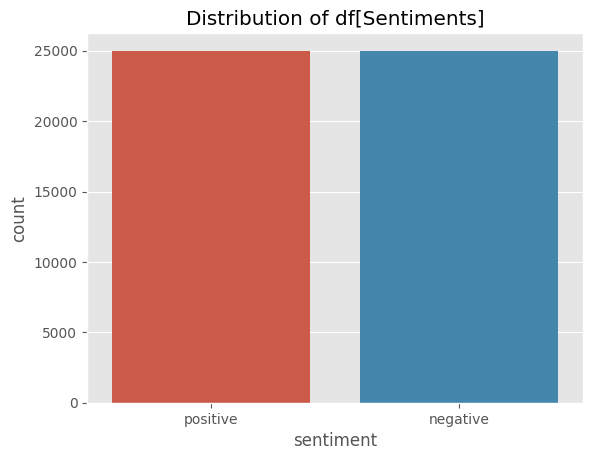

In [8]:
sns.countplot(x='sentiment', data=df)
plt.title("Distribution of df[Sentiments]")

In [9]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Observation
+ Data has two column namely "review" and "sentiment"
+ Both have "Object" data type
+ There are total 50000 data rows
+ No NUll values are present
+ Target column "Sentiment" has only two values 'positive', 'negative' only
+ From 'Distribution of df[Sentiments]' plot it is clear that the target class are balanced

In [10]:
for i in range(5):
    print(f"Review {i }:\n{df['review'].iloc[i]} \n")
    print(f"Sentiment: {df['sentiment'].iloc[i]}\n\n")
    

Review 0:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due 

_Function for counting words_ 
*And then add another column with number of words in review*

In [11]:
def counting_words(words):
    word=words.split()
    return len(word)

In [12]:
df['Num_of_words']=df['review'].apply(counting_words)

In [13]:
df.head(5)

,review,sentiment,Num_of_words
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


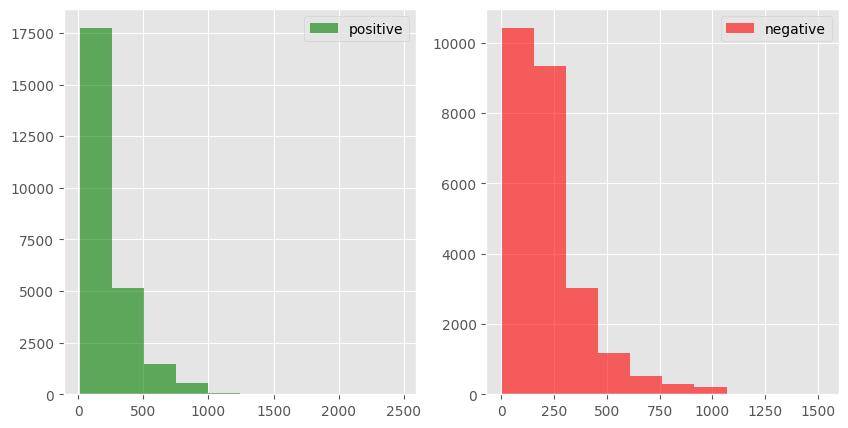

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = ['green', 'red']
labels = ['positive', 'negative']

for i, sentiment in enumerate(['positive', 'negative']):
    ax[i].hist(
        df[df['sentiment'] == sentiment]['Num_of_words'],
        label=labels[i],
        color=colors[i],
        alpha=0.6  
    )
    ax[i].legend(loc='upper right')

plt.show()


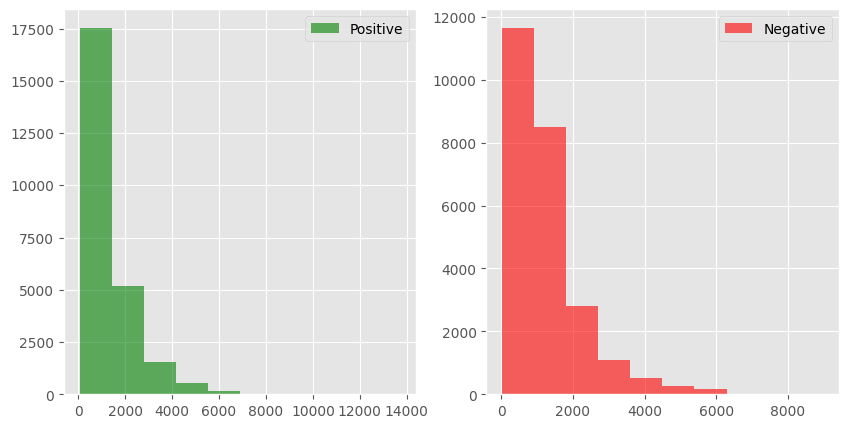

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = ['green', 'red']
labels = ['Positive', 'Negative']

for i, sentiment in enumerate(['positive', 'negative']):
    ax[i].hist(
        df[df['sentiment'] == sentiment]['review'].str.len(),
        label=labels[i],
        color=colors[i],
        alpha=0.6  
    )
    ax[i].legend(loc='upper right')

plt.show()


Manual Encoding of Sentiment class

In [16]:
df.sentiment.replace("positive",1, inplace=True)
df.sentiment.replace("negative",0, inplace=True)
df.head(5)

,review,sentiment,Num_of_words
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


### Feature engineering on Review dataset
1. Cleaning the input data -> removing html tags, special symbols and stop words

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
stop_words=set(stopwords.words("english"))


In [18]:
def cleaning_review(texts):
    texts = texts.lower()
    texts = re.sub(r'<br\s*/?>', ' ', texts)
    texts = re.sub(r'[^\w\s#@]', '', texts)
    texts = re.sub(r'https?\S+|www\S+|http\S+', '', texts, flags=re.MULTILINE)
    text_tokens = word_tokenize(texts)
    
    stop_words = set(stopwords.words("english"))
    negation = False
    cleaned_tokens = []
    
    for word in text_tokens:
        if word in stop_words:
            if negation:
                negation = False
        else:
            if "n't" in word:
                negation = True
            if negation:
                cleaned_tokens.append("not_" + word)
            else:
                cleaned_tokens.append(word)
    
    return " ".join(cleaned_tokens)

In [19]:
df.review=df['review'].apply(cleaning_review)
#df['review'] = df['review'].apply(cleaning_review)

In [20]:
df['review'][1]

'wonderful little production filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

2. Checking and removing duplicated values

In [21]:
print(f"Number of duplicate values : {df.duplicated().sum()}")

Number of duplicate values : 421


In [22]:
data=df.drop_duplicates("review")
print(f"New Shape of data after droping duplicated Values = {data.shape}")

New Shape of data after droping duplicated Values = (49575, 3)


3. Stemming to reduce words to their base or root form

In [23]:
stemmer=PorterStemmer()
def stemming(words):
    texts=[stemmer.stem(text) for text in words]
    return words

In [24]:
data.review=data['review'].apply(cleaning_review)
data.review=data['review'].apply(lambda x : stemming(x))

C:\Users\kiran\AppData\Local\Temp\ipykernel_6504\3305123515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review=data['review'].apply(cleaning_review)
C:\Users\kiran\AppData\Local\Temp\ipykernel_6504\3305123515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review=data['review'].apply(lambda x : stemming(x))


In [25]:
data['Num_of_words']=data['review'].apply(counting_words)

C:\Users\kiran\AppData\Local\Temp\ipykernel_6504\2012418112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Num_of_words']=data['review'].apply(counting_words)


In [26]:
data.head(3)

,review,sentiment,Num_of_words
0,one reviewers mentioned watching 1 oz episode ...,1,167
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86


### Processing positive comments
checking some positive comments

In [27]:
pos_review=data[data.sentiment==1]
pos_review.head(3)

,review,sentiment,Num_of_words
0,one reviewers mentioned watching 1 oz episode ...,1,167
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86


counting presence of each words in positive review

In [28]:
from collections import Counter
count = Counter()
for text in pos_review['review'].values:
    for word in text.split():
        count[word] +=1
print(count.most_common(20))

pos_words=pd.DataFrame(count.most_common(20))
pos_words.columns = ["word", 'Count']
pos_words.head()

[('film', 40024), ('movie', 36511), ('one', 26182), ('like', 17122), ('good', 14507), ('great', 12734), ('story', 12572), ('time', 12074), ('see', 11935), ('well', 11362), ('also', 10694), ('really', 10682), ('would', 10335), ('even', 9437), ('much', 9070), ('first', 8942), ('films', 8560), ('love', 8466), ('people', 8439), ('best', 8358)]


,word,Count
0,film,40024
1,movie,36511
2,one,26182
3,like,17122
4,good,14507


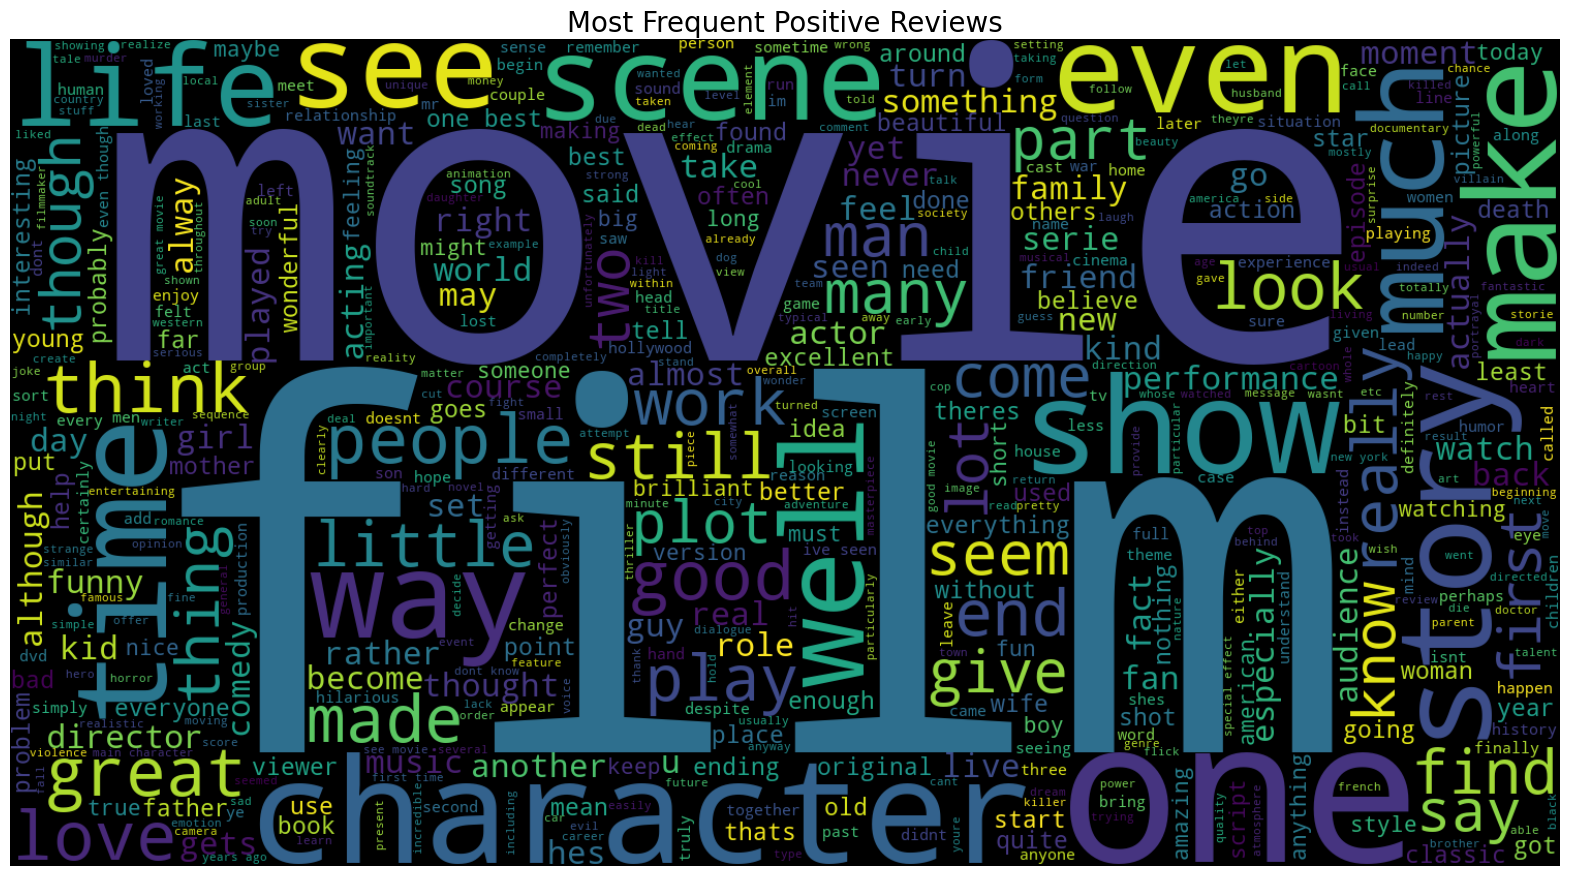

In [29]:
text= " ".join([word for word in pos_review['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Positive Reviews', fontsize=20)
plt.show()


In [30]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install plotly --upgrade

In [32]:
px.bar(pos_words, x='Count', y='word', title='Most common words in positive reviews', color='word')


### Processing Negative comments

In [33]:
neg_review=data[data.sentiment==0]
neg_review.head(3)

,review,sentiment,Num_of_words
3,basically theres family little boy jake thinks...,0,69
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64


In [34]:
from collections import Counter
count_ = Counter()
for text in neg_review['review'].values:
    for word in text.split():
        count_[word] +=1
print(count_.most_common(20))

neg_words=pd.DataFrame(count_.most_common(20))
neg_words.columns = ["word", 'Count']
neg_words.head()

[('movie', 48022), ('film', 35468), ('one', 24901), ('like', 21619), ('even', 14938), ('bad', 14196), ('good', 14193), ('would', 13502), ('really', 12155), ('time', 11688), ('see', 10498), ('dont', 10157), ('get', 9920), ('much', 9872), ('story', 9792), ('people', 9108), ('could', 8939), ('make', 8928), ('movies', 8435), ('made', 8379)]


,word,Count
0,movie,48022
1,film,35468
2,one,24901
3,like,21619
4,even,14938


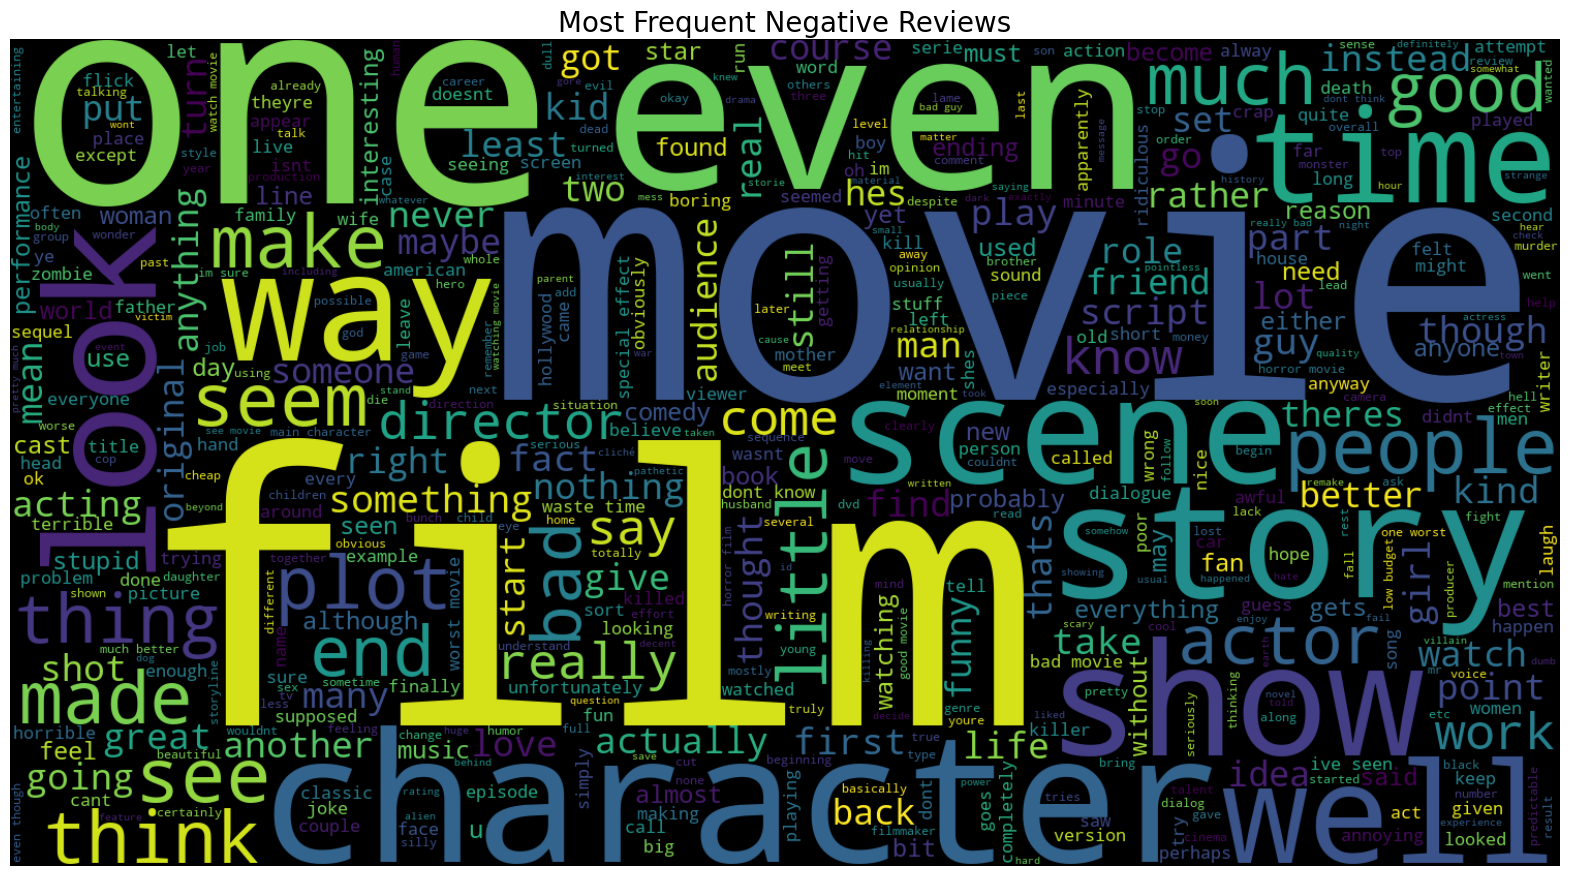

In [35]:
text= " ".join([word for word in neg_review['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1500, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Negative Reviews', fontsize=20)
plt.show()

In [36]:
px.bar(neg_words, x='Count', y='word', title='Most common words in Negative reviews', color='word')

### Vectorization and Importing models

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

Dividing data into X and Y

In [38]:
X=data["review"]
Y=data["sentiment"]

_vectorizing and transforing_

In [39]:
vect=TfidfVectorizer()
X=vect.fit_transform(X)

### Function for evaluating models and comparing there Accuracy, F1 Score, Precission, recall and generating  report

In [41]:
def train_and_evaluate_models(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Naive Bayes', MultinomialNB()),
        ('SVC', LinearSVC()),
        ('Random Forest', RandomForestClassifier())
    ]

    results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

    for model_name, model in models:
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        report = classification_report(y_test, y_pred, output_dict=True)
        
        print(f"{'*'*20} Training model {model_name} {'*'*20}")
        print(f"Accuracy {accuracy} and  F1 Score {f1}")

        results = results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Precision (Positive)': report['1']['precision'],
            'Recall (Positive)': report['1']['recall'],
            'Precision (Negative)': report['0']['precision'],
            'Recall (Negative)': report['0']['recall'],
        }, ignore_index=True)

    return results
train_and_evaluate_models(X, Y)
print(results)

******************** Training model Logistic Regression ********************
Accuracy 0.897428139183056 and  F1 Score 0.89739867038811
******************** Training model Naive Bayes ********************
Accuracy 0.8674735249621786 and  F1 Score 0.8674758975943341
******************** Training model SVC ********************
Accuracy 0.897528996469995 and  F1 Score 0.8975080525644185
******************** Training model Random Forest ********************
Accuracy 0.859102370146243 and  F1 Score 0.8591088983757802


,Model,Accuracy,F1 Score,Precision (Negative),Precision (Positive),Recall (Negative),Recall (Positive)
0,Logistic Regression,0.897428,0.897399,0.904173,0.891178,0.885057,0.909379
1,Naive Bayes,0.867474,0.867476,0.853537,0.881835,0.881568,0.853857
2,SVC,0.897529,0.897508,0.902337,0.893031,0.887521,0.907198
3,Random Forest,0.859102,0.859109,0.854230,0.863872,0.860016,0.858219


### Observation
_from above Scores We can conclude that SVC is the best suited model with Current Accuracy of 89.75_


Now Hyper Tuning the Parameters of LinearSVC to improve the Score

In [45]:
from  sklearn.model_selection import GridSearchCV

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [48]:
svc=LinearSVC()
params={'C':[0.1,1,10,100], 'loss':['hinge','squared_hinge']}
grid= GridSearchCV(svc,params, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[CV 1/5] END .................C=0.1, loss=hinge;, score=0.885 total time=   0.5s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   0.6s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   0.4s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.886 total time=   0.4s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.879 total time=   0.4s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.898 total time=   0.7s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.897 total time=   0.6s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.7s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.898 total time=   0.6s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.6s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.900 total time=   1.7s
[CV 2/5] END ...................C=1, loss=hinge;, score=0.899 total time=   1.6s
[CV 3/5] END ...............

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [49]:
print(f"Best CV score is  {grid.best_score_}")
print(f' Best parameters: {grid.best_params_}')

Best CV score is  0.8976298537569338
 Best parameters: {'C': 1, 'loss': 'hinge'}


_Now using the tuned parameters to train and improve accuracy of the svc model_

In [50]:
svc=LinearSVC(C=1, loss='hinge')
svc.fit(X_train, y_train)

svc_pred=svc.predict(X_test)
svc_accuracy=accuracy_score(svc_pred,y_test)
print(f"Test accuracy: {svc_accuracy * 100:.2f}%")

Test accuracy: 90.08%


In [51]:
confusion_matrix_result = confusion_matrix(y_test, svc_pred)
print(confusion_matrix_result)
print('\n \n')
report_=pd.DataFrame(classification_report(y_test, svc_pred, output_dict=True))
print(report_)

[[4345  527]
 [ 457 4586]]

 

                     0            1  accuracy    macro avg  weighted avg
precision     0.904831     0.896929  0.900756     0.900880      0.900812
recall        0.891831     0.909379  0.900756     0.900605      0.900756
f1-score      0.898284     0.903111  0.900756     0.900698      0.900739
support    4872.000000  5043.000000  0.900756  9915.000000   9915.000000


### Observation
_The Accuracy of model has improved slightly to 90.05%_ 

In [52]:
import joblib
import tensorflow as tf


+ Saving or Replacing the model object
+ Saving Transformer Object

In [57]:

def save_or_replace_model(svc):
    model_filename = 'final_model.joblib'
    current_directory = os.getcwd()
    model_filepath = os.path.join(current_directory, model_filename)

    try:
        loaded_model = joblib.load(model_filepath)
        joblib.dump(svc, model_filepath)
        print(f"Existing model file '{model_filepath}' replaced successfully.")

    except FileNotFoundError:
        joblib.dump(svc, model_filepath)
        print(f"New model file '{model_filepath}' created successfully.")

save_or_replace_model(svc)

Existing model file 'c:\Users\kiran\OneDrive\Desktop\My Assignment\Notebook\final_model.joblib' replaced successfully.


In [59]:
def save_or_replace_transformer(vect):
    tranformer_filename = 'final_tranformer.joblib'
    current_directory = os.getcwd()
    transformer_filepath = os.path.join(current_directory, tranformer_filename)

    try:
        loaded_model = joblib.load(transformer_filepath)
        joblib.dump(vect, transformer_filepath)
        print(f"Existing transformer file '{transformer_filepath}' replaced successfully.")

    except FileNotFoundError:
        joblib.dump(vect, transformer_filepath)
        print(f"New model file '{transformer_filepath}' created successfully.")

save_or_replace_transformer(vect)

Existing transformer file 'c:\Users\kiran\OneDrive\Desktop\My Assignment\Notebook\final_tranformer.joblib' replaced successfully.


+ Loading saved Transformer object
+ Loading final saved model

In [60]:
def load_transformer():
    transformer_filename = 'final_tranformer.joblib'
    current_directory = os.getcwd()
    transformer_filepath = os.path.join(current_directory, transformer_filename)

    try:
        loaded_transformer = joblib.load(transformer_filepath)
        print(f'Transformer loaded successfully from {transformer_filepath}')
        return loaded_transformer

    except FileNotFoundError:
        print(f"Transformer file '{transformer_filepath}' does not exist.")
        return 

loaded_tfidf_vectorizer = load_transformer()

Transformer loaded successfully from c:\Users\kiran\OneDrive\Desktop\My Assignment\Notebook\final_tranformer.joblib


In [76]:
import os
import joblib

def load_model_and_make_predictions():
    model_filename = 'final_model.joblib'
    current_directory = os.getcwd()
    model_filepath = os.path.join(current_directory, model_filename)

    try:
        loaded_model = joblib.load(model_filepath)
        predictions = loaded_model.predict(X_test)
        loaded_model_result = loaded_model
        print(f'Model file Loaded successfully from {model_filepath}')
        return loaded_model_result

    except FileNotFoundError:
        print(f"Model file '{model_filepath}' does not exist.")
        return None 
    
loaded_model = load_model_and_make_predictions()

Model file Loaded successfully from c:\Users\kiran\OneDrive\Desktop\My Assignment\Notebook\final_model.joblib


In [72]:
svc_test_accuracy=accuracy_score(svc_pred,y_test)
print(f"Test accuracy: {svc_test_accuracy * 100:.2f}%")

Test accuracy: 90.08%


### Predicting with loaded object and Model

In [77]:
input_review = ["below average!"]

loaded_tfidf_vectorizer = load_transformer()
loaded_model = load_model_and_make_predictions()

if loaded_tfidf_vectorizer and loaded_model:
    transformed_input = loaded_tfidf_vectorizer.transform(input_review)

    predicted_sentiments = loaded_model.predict(transformed_input)

    for i, review in enumerate(input_review):
        sentiment = "Positive" if predicted_sentiments[i] == 1 else "Negative"
        print(f"Input Review {i+1}: {review}")
        print(f"Predicted Sentiment: {sentiment}")

else:
    print("Unable to perform prediction due to missing transformer or model.")


Model file Loaded successfully from c:\Users\kiran\OneDrive\Desktop\My Assignment\Notebook\final_model.joblib
Input Review 1: below average!
Predicted Sentiment: Negative
